In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv("AirPassengers.csv",parse_dates=["Month"],index_col=["Month"])
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [3]:
df.shape

(144, 1)

In [4]:
df.columns

Index(['#Passengers'], dtype='object')

In [5]:
np.round(df,2)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
res_add = seasonal_decompose(df["#Passengers"],model="additive",period=1)

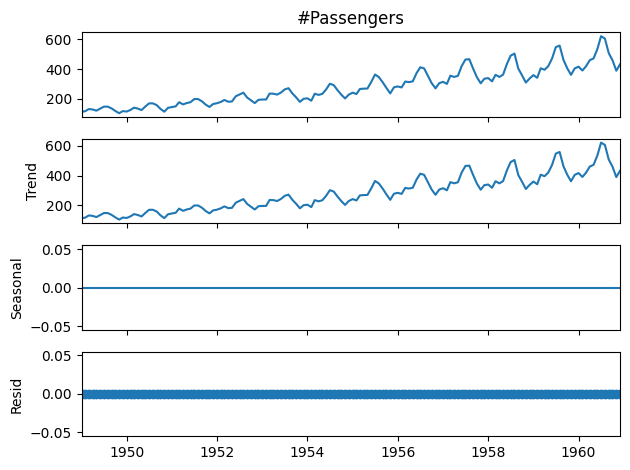

In [8]:
res_add.plot()
plt.show()

In [9]:
res_mult = seasonal_decompose(df["#Passengers"],model="multiplicative",period=1)

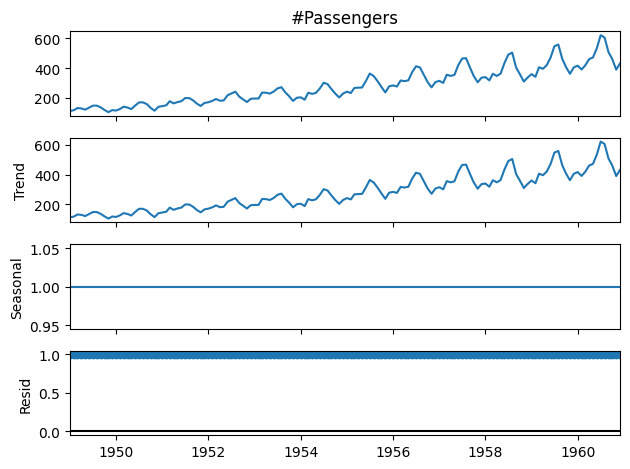

In [10]:
res_mult.plot()
plt.show()

In [11]:
df["Difference"] = df["#Passengers"] - df["#Passengers"].shift(1)

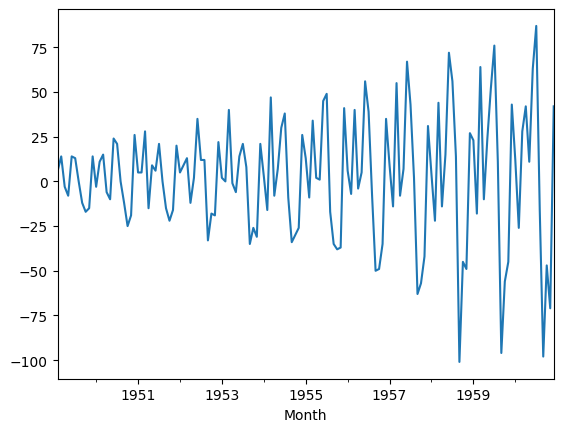

In [12]:
df["Difference"].dropna().plot()
plt.show()

In [13]:
df["Seasonal Differencing"] = df["#Passengers"] - df["#Passengers"].shift(7)

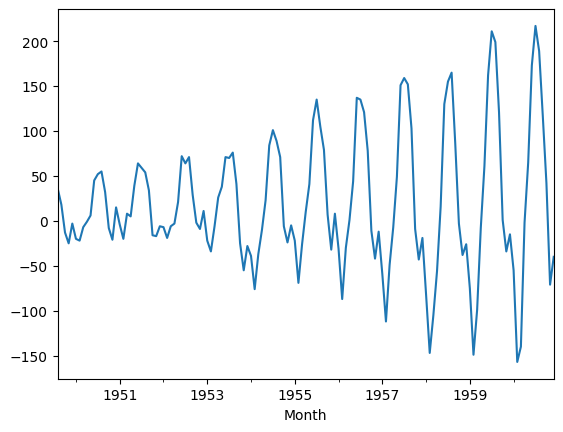

In [14]:
df["Seasonal Differencing"].dropna().plot()
plt.show()

In [15]:
df["log"] = np.log(df["#Passengers"])

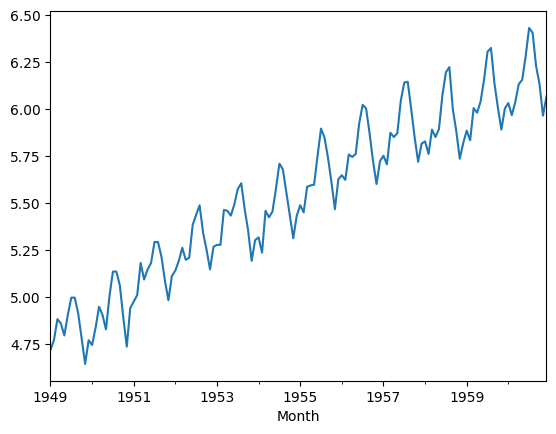

In [16]:
df["log"].dropna().plot()
plt.show()

In [17]:
df["log_Difference"] = df["log"] - df["log"].shift(1)

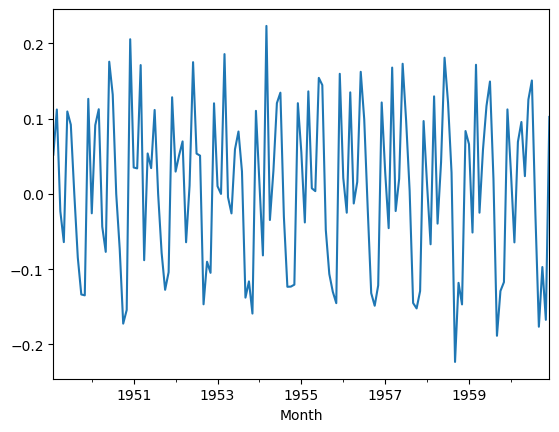

In [18]:
df["log_Difference"].dropna().plot()
plt.show()

In [19]:
df["sqrt"] = np.sqrt(df["#Passengers"])

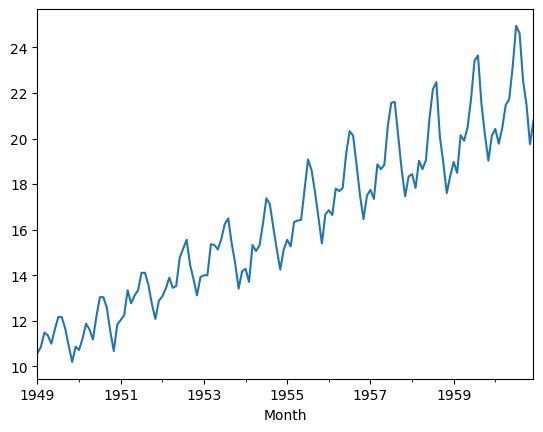

In [20]:
df["sqrt"].dropna().plot()
plt.show()

In [21]:
df["sqrt_Difference"] = df["sqrt"] - df["sqrt"].shift(1)

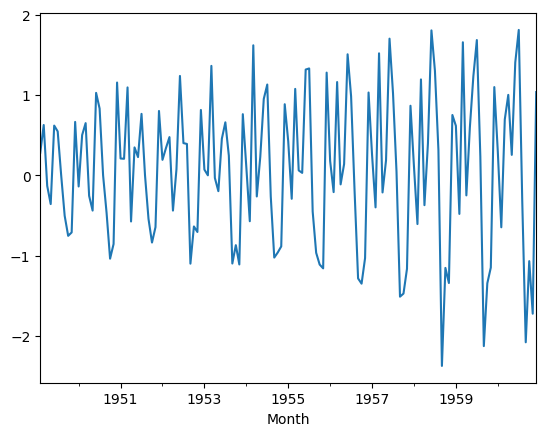

In [22]:
df["sqrt_Difference"].dropna().plot()
plt.show()

In [23]:
df["cbrt"] = np.cbrt(df["#Passengers"])

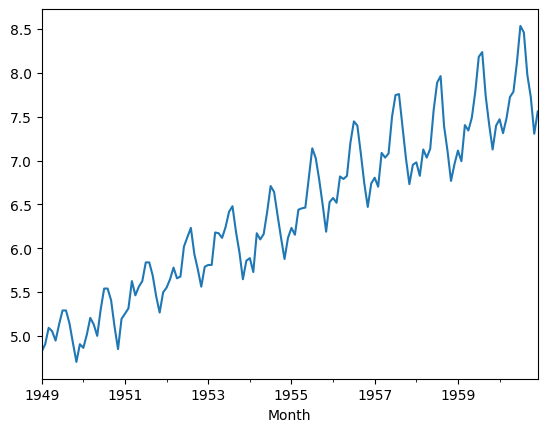

In [24]:
df["cbrt"].dropna().plot()
plt.show()

In [25]:
df["cbrt_Difference"] = df["cbrt"] - df["cbrt"].shift(1)

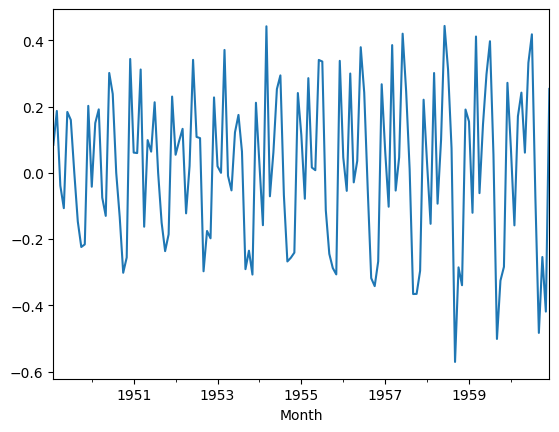

In [26]:
df["cbrt_Difference"].dropna().plot()
plt.show()

In [27]:
df

,#Passengers,Difference,Seasonal Differencing,log,log_Difference,sqrt,sqrt_Difference,cbrt,cbrt_Difference
Month,,,,,,,,,
1949-01-01,112,NaN,NaN,4.718499,NaN,10.583005,NaN,4.820285,NaN
1949-02-01,118,6.0,NaN,4.770685,0.052186,10.862780,0.279775,4.904868,0.084584
1949-03-01,132,14.0,NaN,4.882802,0.112117,11.489125,0.626345,5.091643,0.186775
1949-04-01,129,-3.0,NaN,4.859812,-0.022990,11.357817,-0.131309,5.052774,-0.038869
1949-05-01,121,-8.0,NaN,4.795791,-0.064022,11.000000,-0.357817,4.946087,-0.106687
...,...,...,...,...,...,...,...,...,...
1960-08-01,606,-16.0,189.0,6.406880,-0.026060,24.617067,-0.322861,8.462348,-0.073830
1960-09-01,508,-98.0,117.0,6.230481,-0.176399,22.538855,-2.078212,7.979112,-0.483236
1960-10-01,461,-47.0,42.0,6.133398,-0.097083,21.470911,-1.067945,7.725032,-0.254080


In [28]:
import dateutil.parser as parse
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller,pacf,acf
import math

In [29]:
x = np.round(df,2)
def test_stationarity(x):
    
    test = adfuller(x)
    out = pd.Series(test[:4],index = ["test statistic","pvalue","usedlag","no of observations"])
    print(out)

In [30]:
test_stationarity(df["#Passengers"])

test statistic          0.815369
pvalue                  0.991880
usedlag                13.000000
no of observations    130.000000
dtype: float64


In [31]:
test_stationarity(df["Difference"].dropna())

test statistic         -2.829267
pvalue                  0.054213
usedlag                12.000000
no of observations    130.000000
dtype: float64


In [32]:
test_stationarity(df["Seasonal Differencing"].dropna())

test statistic         -3.380110
pvalue                  0.011656
usedlag                13.000000
no of observations    123.000000
dtype: float64


In [33]:
test_stationarity(df["log"])

test statistic         -1.717017
pvalue                  0.422367
usedlag                13.000000
no of observations    130.000000
dtype: float64


In [34]:
test_stationarity(df["log_Difference"].dropna())

test statistic         -2.717131
pvalue                  0.071121
usedlag                14.000000
no of observations    128.000000
dtype: float64


In [35]:
test_stationarity(df["sqrt"])

test statistic         -0.345854
pvalue                  0.918754
usedlag                13.000000
no of observations    130.000000
dtype: float64


In [36]:
test_stationarity(df["sqrt_Difference"].dropna())

test statistic         -3.186422
pvalue                  0.020784
usedlag                12.000000
no of observations    130.000000
dtype: float64


In [37]:
test_stationarity(df["cbrt"])

test statistic         -0.810035
pvalue                  0.816157
usedlag                13.000000
no of observations    130.000000
dtype: float64


In [38]:
test_stationarity(df["cbrt_Difference"].dropna())

test statistic         -3.199635
pvalue                  0.020006
usedlag                12.000000
no of observations    130.000000
dtype: float64


In [39]:
df

,#Passengers,Difference,Seasonal Differencing,log,log_Difference,sqrt,sqrt_Difference,cbrt,cbrt_Difference
Month,,,,,,,,,
1949-01-01,112,NaN,NaN,4.718499,NaN,10.583005,NaN,4.820285,NaN
1949-02-01,118,6.0,NaN,4.770685,0.052186,10.862780,0.279775,4.904868,0.084584
1949-03-01,132,14.0,NaN,4.882802,0.112117,11.489125,0.626345,5.091643,0.186775
1949-04-01,129,-3.0,NaN,4.859812,-0.022990,11.357817,-0.131309,5.052774,-0.038869
1949-05-01,121,-8.0,NaN,4.795791,-0.064022,11.000000,-0.357817,4.946087,-0.106687
...,...,...,...,...,...,...,...,...,...
1960-08-01,606,-16.0,189.0,6.406880,-0.026060,24.617067,-0.322861,8.462348,-0.073830
1960-09-01,508,-98.0,117.0,6.230481,-0.176399,22.538855,-2.078212,7.979112,-0.483236
1960-10-01,461,-47.0,42.0,6.133398,-0.097083,21.470911,-1.067945,7.725032,-0.254080


In [40]:
#plt.plot(df["log"])

In [41]:
ts_log = df["log"]
ts_log

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: log, Length: 144, dtype: float64

In [50]:
movingAverage = ts_log.rolling(window = 12).mean()

In [51]:
movingSTD = ts_log.rolling(window=12).std()

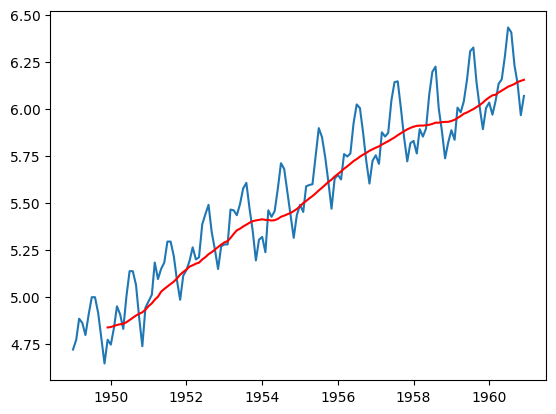

In [52]:
plt.plot(ts_log)
plt.plot(movingAverage,color="red")

In [53]:
ts_log_av_diff = ts_log - movingAverage

In [54]:
ts_log_av_diff

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
                ...   
1960-08-01    0.282363
1960-09-01    0.098235
1960-10-01   -0.009230
1960-11-01   -0.182690
1960-12-01   -0.085789
Name: log, Length: 144, dtype: float64

In [55]:
ts_log_av_diff.dropna(inplace=True)

In [56]:
ts_log_av_diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: log, dtype: float64

In [57]:
test_stationarity(ts_log_av_diff)     # p < 0.02 => it is stationary

test statistic         -3.162908
pvalue                  0.022235
usedlag                13.000000
no of observations    119.000000
dtype: float64


In [58]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA

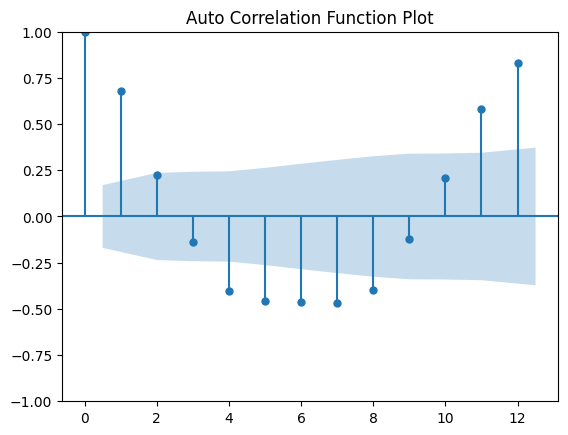

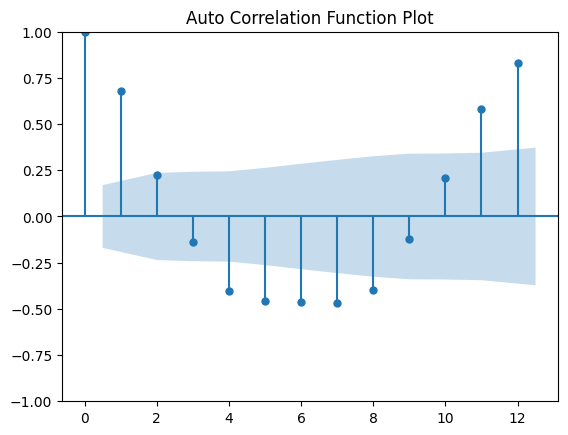

In [59]:
title = "Auto Correlation Function Plot"
lags = 12 
plot_acf(ts_log_av_diff,lags = 12 ,title = "Auto Correlation Function Plot")

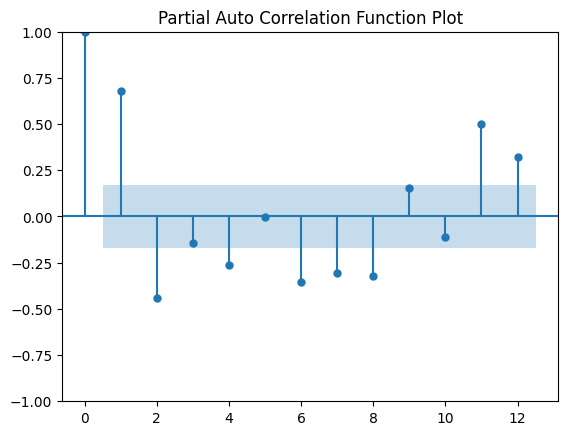

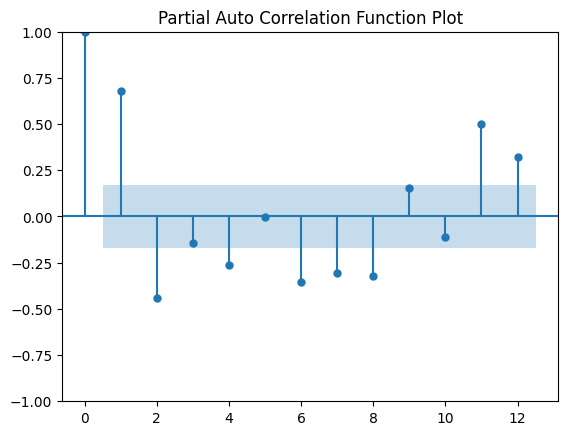

In [60]:
title = "Partial Auto Correlation Function Plot"
lags = 12
plot_pacf(ts_log_av_diff,lags = 12 ,title = "Partial Auto Correlation Function Plot")

In [61]:
model = ARIMA(ts_log,order=(1,1,1))

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [62]:
results_ARIMA = model.fit()

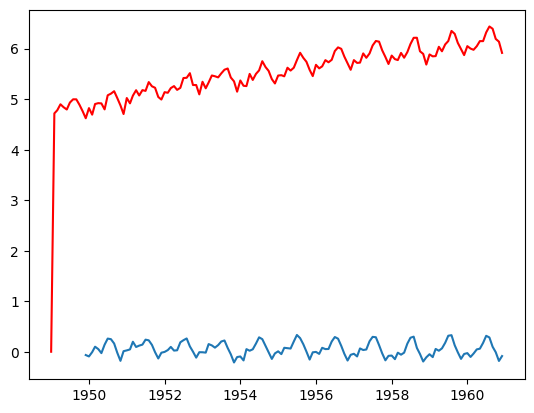

In [63]:
plt.plot(ts_log_av_diff)
plt.plot(results_ARIMA.fittedvalues,color="red")

In [64]:
prediction_ARIMA_difference = pd.Series(results_ARIMA.fittedvalues,copy=True)
prediction_ARIMA_difference.head()

Month
1949-01-01    0.000000
1949-02-01    4.718499
1949-03-01    4.780426
1949-04-01    4.899112
1949-05-01    4.841283
dtype: float64

In [65]:
prediction_ARIMA_difference_cumsum = prediction_ARIMA_difference.cumsum()

In [66]:
prediction_ARIMA_difference_cumsum.head()

Month
1949-01-01     0.000000
1949-02-01     4.718499
1949-03-01     9.498925
1949-04-01    14.398037
1949-05-01    19.239320
dtype: float64

In [67]:
ts_log.iloc[0]

4.718498871295094

In [68]:
prediction_ARIMA_log = pd.Series(ts_log.iloc[0 :],index = ts_log.index)
prediction_ARIMA_log = prediction_ARIMA_log.add(prediction_ARIMA_difference_cumsum)

In [69]:
prediction_ARIMA_log.head()

Month
1949-01-01     4.718499
1949-02-01     9.489184
1949-03-01    14.381727
1949-04-01    19.257849
1949-05-01    24.035111
dtype: float64

In [70]:
prediction_ARIMA = np.exp(prediction_ARIMA_log)
prediction_ARIMA

C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Month
1949-01-01    1.120000e+02
1949-02-01    1.321600e+04
1949-03-01    1.761589e+06
1949-04-01    2.309817e+08
1949-05-01    2.743569e+10
                  ...     
1960-08-01             inf
1960-09-01             inf
1960-10-01             inf
1960-11-01             inf
1960-12-01             inf
Length: 144, dtype: float64

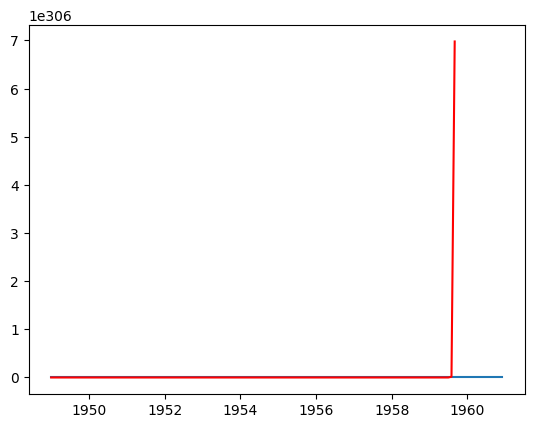

In [71]:
plt.plot(df["#Passengers"])
plt.plot(prediction_ARIMA,color ="red")
plt.show()